In [ ]:
#importing some necessary libraries for future analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ***Loading Dataset***

In [ ]:
df=pd.read_csv('/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.size

1000

In [ ]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

## ***Exploratory Data Analysis***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


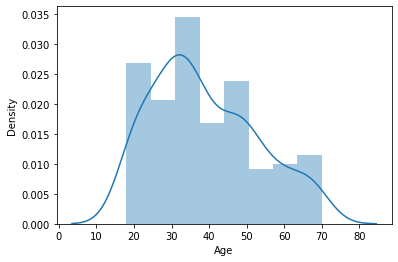

In [ ]:
sns.distplot(df['Age'])

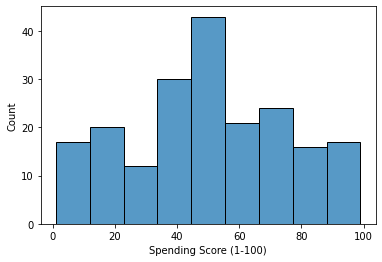

In [ ]:
sns.histplot(df['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


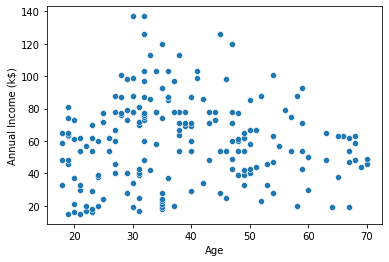

In [ ]:
sns.scatterplot(df['Age'],df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


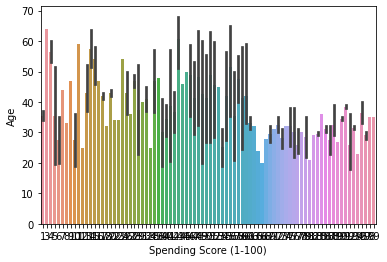

In [ ]:
sns.barplot(df['Spending Score (1-100)'],df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


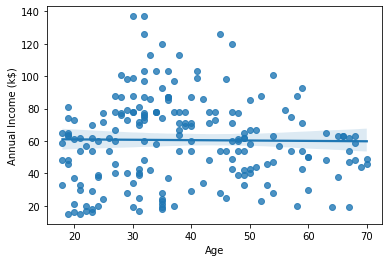

In [ ]:
sns.regplot(df['Age'],df['Annual Income (k$)'])

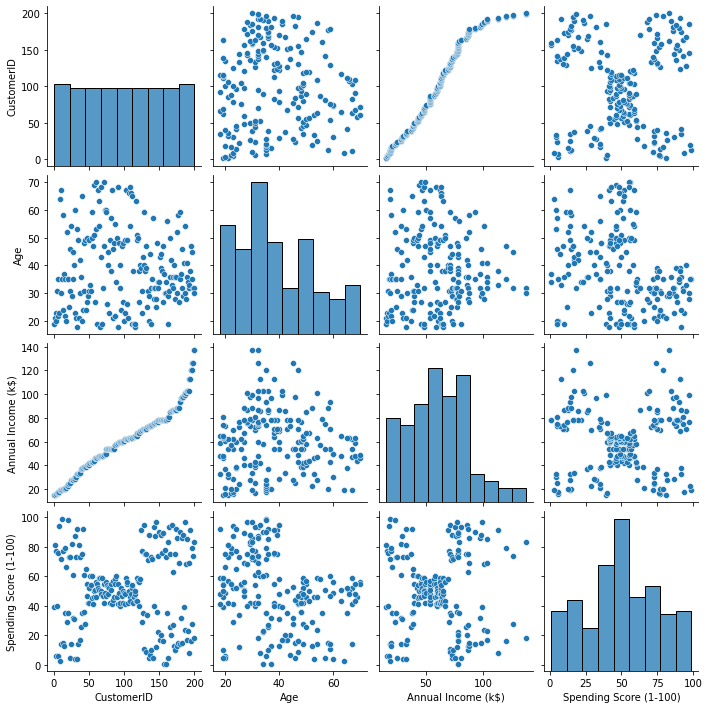

In [ ]:
sns.pairplot(df)

## ***Descriptive Statistics***

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df['Age'].mode()

0    32
dtype: int64

In [ ]:
df['Annual Income (k$)'].var()

689.8355778894472

## ***Looking For Null Values***

In [ ]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## ***Outlier Detection & Replacing Outliers***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


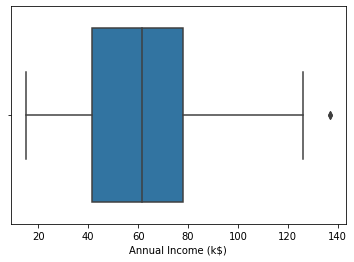

In [ ]:
sns.boxplot(df['Annual Income (k$)'])

In [ ]:
q1=df['Annual Income (k$)'].quantile(0.25)
q3=df['Annual Income (k$)'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_bound,upper_bound,np.where(df['Annual Income (k$)']<lower_bound,lower_bound,df['Annual Income (k$)']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


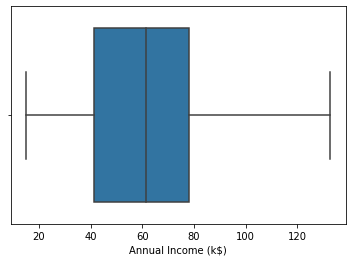

In [ ]:
sns.boxplot(df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


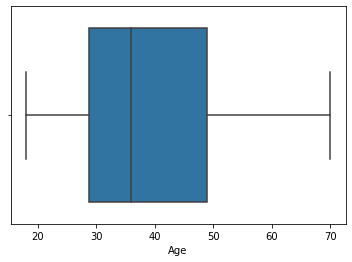

In [ ]:
sns.boxplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


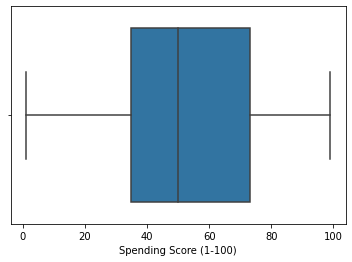

In [ ]:
sns.boxplot(df['Spending Score (1-100)'])

## ***Exploring Categorical Columns***

In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


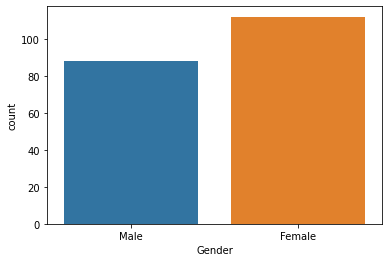

In [ ]:
sns.countplot(df['Gender'])

## ***Label Encoding***

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


In [ ]:
new_df=df.drop(['CustomerID'],axis=1)
new_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


## ***Scaling The Data***

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=pd.DataFrame(sc.fit_transform(new_df),columns=new_df.columns)
scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.745429,-0.434801
1,1.128152,-1.281035,-1.745429,1.195704
2,-0.886405,-1.352802,-1.707083,-1.715913
3,-0.886405,-1.137502,-1.707083,1.040418
4,-0.886405,-0.563369,-1.668737,-0.395980


## ***Kmean Clustering***

In [ ]:
from sklearn import cluster

In [ ]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(scaled)
    error.append(kmeans.inertia_)

In [ ]:
error

[799.9999999999998,
 588.8027143528254,
 476.88736023197646,
 386.74906683579184,
 325.6244485567941,
 278.41694976170555,
 235.7830051691861,
 199.77471678255978,
 176.49597500635298,
 151.34911220026675]

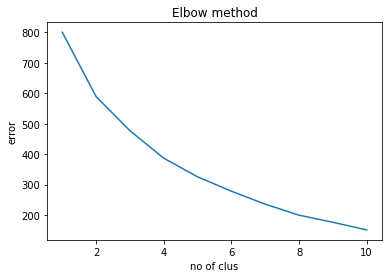

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [ ]:
k_model=cluster.KMeans(n_clusters=4,init='k-means++',random_state=0)

In [ ]:
k_model.fit(scaled)

KMeans(n_clusters=4, random_state=0)

In [ ]:
y_kmean=k_model.predict(scaled)
y_kmean

array([2, 2, 3, 1, 1, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 2, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 2, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 3, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 3, 2, 1, 1, 3, 3, 3, 3, 2, 3, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2], dtype=int32)

In [ ]:
k_model.predict([[1,1,25,18,40]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int32)

In [ ]:
scaled['output'] = pd.Series(y_kmean)

In [ ]:
scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),output
0,1.128152,-1.424569,-1.745429,-0.434801,2
1,1.128152,-1.281035,-1.745429,1.195704,2
2,-0.886405,-1.352802,-1.707083,-1.715913,3
3,-0.886405,-1.137502,-1.707083,1.040418,1
4,-0.886405,-0.563369,-1.668737,-0.395980,1


In [ ]:
scaled.shape

(200, 5)

## ***Independent And Depedent Features***

In [ ]:
Independent=scaled.drop(['output'],axis=1)
Dependent=scaled['output']
Independent.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.745429,-0.434801
1,1.128152,-1.281035,-1.745429,1.195704
2,-0.886405,-1.352802,-1.707083,-1.715913
3,-0.886405,-1.137502,-1.707083,1.040418
4,-0.886405,-0.563369,-1.668737,-0.395980


In [ ]:
Dependent.head()

0    2
1    2
2    3
3    1
4    1
Name: output, dtype: int32

# ***Splitting Into Train and Test***

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Independent,Dependent,test_size=0.3,random_state=0)

## ***Logistic Regression Algorithm***

***Training***

In [ ]:
from sklearn.linear_model import LogisticRegression
rfc=LogisticRegression()
model=rfc.fit(x_train,y_train)

***Testing***

In [ ]:
y_pred=model.predict(x_test)

## ***Evaluation Metrics***

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 1.0


In [ ]:
matrix=confusion_matrix(y_test,y_pred)
print("confusion matrix:",matrix)

confusion matrix: [[15  0  0  0]
 [ 0 14  0  0]
 [ 0  0 11  0]
 [ 0  0  0 20]]


Text(33.0, 0.5, 'actual')

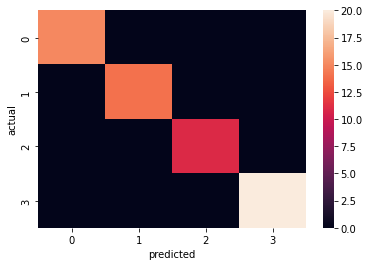

In [ ]:
sns.heatmap(matrix)
plt.xlabel('predicted')
plt.ylabel("actual")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

